In [1]:
from pythonknot import alexander_poly as ap
import numpy as np
import sys 
 
sys.path.append('/home/zzhang/KnotFormer/Guided_Diff_L80')
 
from data.data import LABEL

 
acc = []
cfg = 5
types_arr = []
sizes_arr = []
for knot_type in LABEL:
    knots = np.load(f'/home/zzhang/KnotFormer/Guided_Diff_L80/gene_data/T1000/ep81_diff_loss_0_1301/gene_gd{cfg}_{knot_type}.npy')
    aps = ap.calculate_knot_size(knots,'ring')
    types = aps[0]
    sizes = np.array(aps[1])[:,-1]

    types_arr.append(types)
    sizes_arr.append(sizes)
    
    if knot_type == 'UN':
        acc.append(len([x for x in types if x == '1']) / len(knots))
    else:
        acc.append(len([x for x in types if x == knot_type[0]+'_'+knot_type[1]]) / len(knots))
 
  

knot type not found, with polynomial as:-2+t
knot type not found, with polynomial as:1+t^3-t^2
knot type not found, with polynomial as:1-t-t^7-t^4+t^5+t^3+t^8
knot type not found, with polynomial as:1-t-t^7-t^4+t^5+t^3+t^8
knot type not found, with polynomial as:1-t-t^7-t^4+t^5+t^3+t^8
knot type not found, with polynomial as:1-t-t^7-t^4+t^5+t^3+t^8
knot type not found, with polynomial as:1-t-t^7-t^4+t^5+t^3+t^8
knot type not found, with polynomial as:1-t-t^7-t^4+t^5+t^3+t^8


In [15]:
acc

[1.0, 0.95, 0.869, 0.979, 0.834, 0.924, 0.778, 0.564]

In [23]:
set(types_arr[-1])

{'1', '3_1', '4_1', '5_1', '5_2', '6_2', '6_3', '8_19', '8_20', '8_21'}

In [29]:
import matplotlib.pyplot as plt 
# plt.subplot(2,1,1)
# plt.hist(types_arr[-1])
for idx in reversed(range(len(types_arr))):
    knot_arr = set(types_arr[idx])
    print(f'FOR {LABEL[idx]}')
    for knot in knot_arr:
        print(f'for knot {knot} = {types_arr[idx].count(knot)}')
    print('------------------------------------')
# knot_arr = set(types_arr[-1])
# for knot in knot_arr:
#     print(f'for knot {knot} = {types_arr[-1].count(knot)}')
# print('------------------------------------')
# # plt.subplot(2,1,2)
# # plt.hist(types_arr[-2])
# knot_arr = set(types_arr[-2])
# for knot in knot_arr:
#     print(f'for knot {knot} = {types_arr[-2].count(knot)}')

FOR 63
for knot 8_21 = 1
for knot 8_20 = 93
for knot 1 = 139
for knot 5_1 = 2
for knot 5_2 = 31
for knot 4_1 = 10
for knot 3_1 = 156
for knot 8_19 = 1
for knot 6_3 = 564
for knot 6_2 = 3
------------------------------------
FOR 62
for knot 8_21 = 1
for knot 8_20 = 2
for knot 1 = 69
for knot 5_1 = 16
for knot 5_2 = 10
for knot 4_1 = 44
for knot 3_1 = 60
for knot 7_2 = 1
for knot 8_19 = 2
for knot 6_1 = 14
for knot 6_2 = 778
for knot 7_3 = 1
for knot 6_3 = 2
------------------------------------
FOR 61
for knot 1 = 26
for knot 5_2 = 3
for knot 4_1 = 40
for knot 3_1 = 6
for knot 6_1 = 924
for knot 6_2 = 1
------------------------------------
FOR 52
for knot 1 = 41
for knot 5_1 = 40
for knot 5_2 = 834
for knot 4_1 = 12
for knot 3_1 = 71
for knot 6_1 = 1
for knot 6_2 = 1
------------------------------------
FOR 51
for knot 3_1 = 17
for knot 1 = 1
for knot 5_1 = 979
for knot 5_2 = 3
------------------------------------
FOR 41
for knot 4_1 = 869
for knot 3_1 = 10
for knot 1 = 119
for knot 5_2 

In [14]:

types_arr[-1].count('1')

139

[1.0, 0.95, 0.869, 0.979, 0.834, 0.924, 0.778, 0.564]


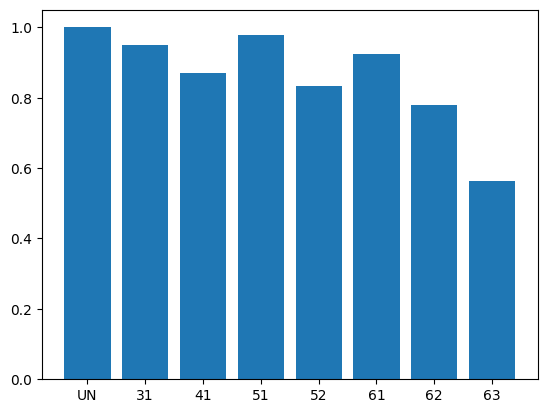

In [38]:
import matplotlib.pyplot as plt
plt.bar(LABEL,acc)
print(acc)

## Record correct knotsizes

In [34]:
import os 
import pandas as pd

opj = os.path.join
crt_dir = os.getcwd()
size_dict = {}
ap_LABELS = ['1','3_1','4_1','5_1','5_2','6_1','6_2','6_3']
for i in range(len(LABEL)):
    print(f'{LABEL[i]}: {acc[i]}')
    size = np.array(sizes_arr[i])
    right_size = size[np.array(types_arr[i]) == ap_LABELS[i]]
    assert len(right_size) == acc[i] * len(size)
    size_dict[LABEL[i]] = right_size
    
np.save(opj(crt_dir,f'ep81_diff_loss_0_1301/ord_para/knot_sizes.npy'),size_dict,allow_pickle=True)
df = pd.DataFrame.from_dict(size_dict, orient='index')
df.to_csv(opj(crt_dir,f'ep81_diff_loss_0_1301/ord_para/knot_sizes.csv'))

UN: 1.0
31: 0.951
41: 0.899
51: 0.973
52: 0.836
61: 0.916
62: 0.809
63: 0.582


### Get GT Knot size

In [ ]:
gt_knotsize=[]
for knot_type in LABEL:
    knots = np.load(f'/home/zzhang/LP_knot_id/L80/traj_knot{knot_type}_L80_close.npy')[:1000]
    aps = ap.calculate_knot_size(knots,'ring')
    sizes = np.array(aps[1])[:,-1]

    gt_knotsize.append(sizes)
    



knot type not found, with polynomial as:1-t+t^3
knot type not found, with polynomial as:1-t+t^3
knot type not found, with polynomial as:1-t+2*t^3-3*t^2


In [38]:
np.array(gt_knotsize).mean(axis=1)

array([ 1.   , 49.53 , 56.271, 61.493, 59.94 , 63.42 , 64.162, 63.12 ])

In [5]:

def bond_cal(data):
    assert len(data.shape) == 3
    return np.linalg.norm(np.roll(knots,shift=1,axis =1) - knots,axis = -1).flatten()
bond_cal(knots).shape

(80000,)

## Get Rg RMSD Bond

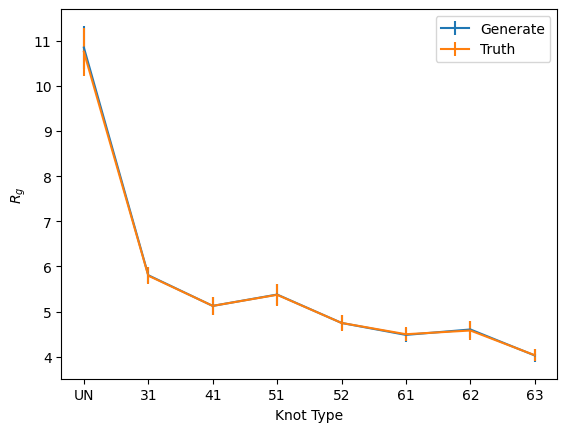

In [ ]:
_RMSD =[]

Rg_real = []
Rg_gen = []

Bond_real = []
Bond_gen = []

Angle_gen = []
Angle_real = []

def R_g(data):
    assert len(data.shape) == 3
    return np.sqrt(np.square(data-np.expand_dims(data.sum(axis=1),axis = 1)/data.shape[1]).sum(axis=-1)).sum(axis=-1)\
                /data.shape[1]

def bond_cal(data):
    assert len(data.shape) == 3
    return np.linalg.norm(np.roll(data,shift=1,axis =1) - data,axis = -1).flatten()

def angle_cal(data):
    bonds = np.roll(data, -1, axis=1) - data
    bonds =  bonds / np.linalg.norm(bonds,axis = -1,keepdims=True)
    inter_dot = np.einsum('ijk,ijk->ij',np.roll(bonds, -1, axis=1), bonds)
    return np.arccos(np.clip(inter_dot, -1.0, 1.0)).flatten()  

cfg=10
import rmsd
for knot_type in LABEL:
    knots = np.load(f'/home/zzhang/LP_knot_id/L80/traj_knot{knot_type}_L80_close.npy')
    gen_knots = np.load(f'/home/zzhang/KnotFormer/Guided_Diff_L80/gene_data/T1000/ep81_diff_loss_0_1301/gene_gd{cfg}_{knot_type}.npy')
    
    Rg_real.append(R_g(knots))
    Rg_gen.append(R_g(gen_knots))

    Bond_real.append(bond_cal(knots))
    Bond_gen.append(bond_cal(gen_knots))

    Angle_real.append(angle_cal(knots))
    Angle_gen.append(angle_cal(gen_knots))

    gen_knot = gen_knots[0] - rmsd.centroid(gen_knots[0])
    RMSD_arr=[]
    for knot in knots:
        knot = knot - rmsd.centroid(knot)

        U = rmsd.kabsch(knot, gen_knot)
        knot = np.dot(knot, U)

        RMSD_arr.append(rmsd.rmsd(knot, gen_knot))
    _RMSD.append(RMSD_arr)
plt.errorbar(LABEL,np.array(Rg_gen).mean(axis=1),yerr = np.array(Rg_gen).std(axis= 1), label ='Generate')
plt.errorbar(LABEL,np.array(Rg_real).mean(axis=1),yerr = np.array(Rg_real).std(axis= 1), label='Truth')
plt.xlabel('Knot Type')
plt.ylabel('$R_g$')
plt.legend()

#### Save Rg into csv and npy

In [44]:
import os 
import pandas as pd

opj = os.path.join
crt_dir = os.getcwd()
Rg_dict = {}
ap_LABELS = ['1','3_1','4_1','5_1','5_2','6_1','6_2','6_3']
for i in range(len(LABEL)):
    print(f'{LABEL[i]}: {acc[i]}')
    size = np.array(Rg_gen[i])
    right_rg = size[np.array(types_arr[i]) == ap_LABELS[i]]
    assert len(right_rg) == acc[i] * len(size)
    Rg_dict[LABEL[i]] = right_rg
    
np.save(opj(crt_dir,f'ep81_diff_loss_0_1301/ord_para/knot_rg.npy'),Rg_dict,allow_pickle=True)
df = pd.DataFrame.from_dict(Rg_dict, orient='index')
df.to_csv(opj(crt_dir,f'ep81_diff_loss_0_1301/ord_para/knot_rg.csv'))

UN: 1.0
31: 0.951
41: 0.899
51: 0.973
52: 0.836
61: 0.916
62: 0.809
63: 0.582


### Get GT Rg

In [ ]:
gt_rg=[]
for knot_type in LABEL:
    knots = np.load(f'/home/zzhang/LP_knot_id/L80/traj_knot{knot_type}_L80_close.npy')[:1000]
    rg = R_g(knots)

    gt_rg.append(rg)

In [7]:
np.array(gt_rg).mean(axis=1)

array([10.78812372,  5.79878138,  5.11587049,  5.35510216,  4.74986646,
        4.49221575,  4.57149778,  4.0271529 ])

## Sanity Check for RMSD

In [ ]:
knots = np.load(f'/home/zzhang/LP_knot_id/L80/traj_knot{knot_type}_L80_close.npy')
gen_knots = np.load(f'/home/zzhang/KnotFormer/Guided_Diff_L80/gene_data/T1000/ep64_dif_loss_0_1310/gene_gd10_{knot_type}.npy')


# gen_knot = gen_knots[0] - rmsd.centroid(gen_knots[0])
gen_knot = knots[0] - rmsd.centroid(knots[0])
RMSD_arr=[]
for knot in knots:
    knot = knot - rmsd.centroid(knot)

    U = rmsd.kabsch(knot, gen_knot)
    knot = np.dot(knot, U)

    RMSD_arr.append(rmsd.rmsd(knot, gen_knot))

In [13]:
min(RMSD_arr)

np.float64(2.028054582839504e-15)

## Plot RMSD

Text(0, 0.5, 'RMSD')

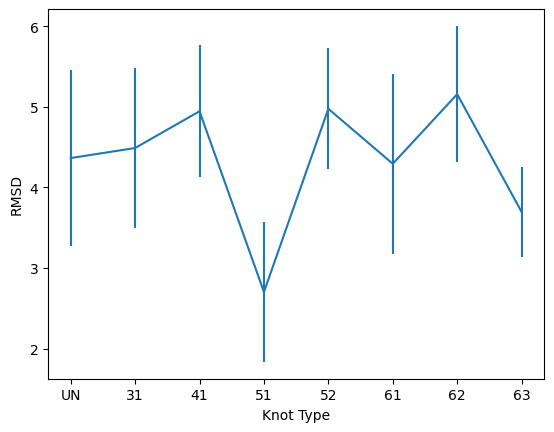

In [ ]:
plt.errorbar(LABEL, np.array(_RMSD).mean(axis=1), np.array(_RMSD).std(axis=1))
plt.xlabel('Knot Type')
plt.ylabel('RMSD')

In [39]:
np.array(_RMSD).mean(axis=1)

array([4.36330045, 4.48795029, 4.9441226 , 2.7014046 , 4.97426116,
       4.29245775, 5.15592212, 3.69470962])

#### Write RMSD (including incorrect ones)

In [15]:
import os
import pandas as pd
opj = os.path.join
crt_dir = os.getcwd()
RMSD_dict = {}
ap_LABELS = ['1','3_1','4_1','5_1','5_2','6_1','6_2','6_3']
_RMSD = np.array(_RMSD)
for i in range(len(LABEL)):
    print(f'{LABEL[i]}: {acc[i]}')
    _rmsd = np.array(_RMSD[i])
    RMSD_dict[LABEL[i]] = _rmsd
    
np.save(opj(crt_dir,f'ep81_diff_loss_0_1301/ord_para/rmsd.npy'),RMSD_dict,allow_pickle=True)
df = pd.DataFrame.from_dict(RMSD_dict)
df.to_csv(opj(crt_dir,f'ep81_diff_loss_0_1301/ord_para/rmsd.csv'))

UN: 1.0
31: 0.951
41: 0.899
51: 0.973
52: 0.836
61: 0.916
62: 0.809
63: 0.582


## Compare RMSD across knot types

In [18]:
_RMSD.std(axis = -1)

array([1.08815276, 0.99195897, 0.81861872, 0.86747724, 0.75124066,
       1.11503414, 0.84684725, 0.56029672])

In [23]:
np.array(_RMSD).min(axis=1)

array([1.2154126 , 1.09245165, 1.10181985, 0.86762864, 1.23178379,
       0.88392724, 1.353908  , 0.98195129])

### get the minimum RMSD conformations and plot together

0.8676286351209384


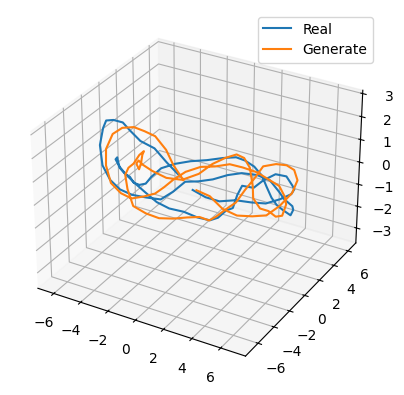

In [36]:
num = 3
idx = np.argwhere(np.array(_RMSD)[num] == np.array(_RMSD)[num].min())[0][0]
knot = np.load(f'/home/zzhang/LP_knot_id/L80/traj_knot{LABEL[num]}_L80_close.npy')[idx]
gen_knot = np.load(f'/home/zzhang/KnotFormer/Guided_Diff_L80/gene_data/T1000/ep81_diff_loss_0_1301/gene_gd10_{LABEL[num]}.npy')[0]
gen_knot = gen_knot - rmsd.centroid(gen_knot)

knot = knot - rmsd.centroid(knot)

U = rmsd.kabsch(knot, gen_knot)
knot = np.dot(knot, U)
print(rmsd.rmsd(knot, gen_knot))

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(knot[:, 0], knot[:, 1], knot[:, 2],label='Real')
ax.plot(gen_knot[:, 0], gen_knot[:, 1], gen_knot[:, 2], label= 'Generate')
ax.legend()
plt.show()


## Angles

[ 1.80595615e-02 -4.65295569e-01  1.94226503e+01] [3.47479631e-03 2.10788388e+01]


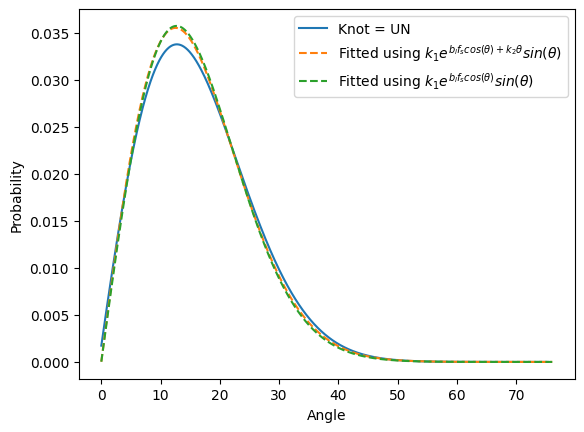

In [36]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import bezier
def plot_Angle_dist(angle_arr, lab):
    counts, bins = np.histogram(angle_arr*180/np.pi, 100)

    # plt.plot(bins[:-1], counts/np.sum(counts))
    nodes = np.asfortranarray([
        bins[:-1],
        counts/np.sum(counts),
        ])
    curve  = bezier.Curve.from_nodes(nodes)

    s_vals = np.linspace(0.0, 1.0, 1200)
    f1 = plt.plot( curve.evaluate_multi(s_vals)[0], curve.evaluate_multi(s_vals)[1], label = 'Knot = ' + str(lab))
    return f1[0].get_color()

# plt.hist(np.array(Angle_gen[-1])*180/np.pi,bins=100,alpha=0.5,label='Generate')
# plt.hist(np.array(Angle_real[-1])*180/np.pi,bins=100,alpha=0.5,label='Truth')
counts, bins = np.histogram(Angle_real[0], 100)

def angle_distribution(theta,k1,k2,f_s):
    b_l = 0.96
    return k1*np.exp(b_l *f_s* np.cos(theta)+k2*theta)*np.sin(theta)
popt ,pcov = curve_fit(angle_distribution,bins[:-1],counts,maxfev=5000)

def angle_distribution_test(theta,k1,f_s):
    b_l = 0.96
    return k1*np.exp(b_l *f_s* np.cos(theta))*np.sin(theta)
popt ,pcov = curve_fit(angle_distribution,bins[:-1],counts,maxfev=5000)
popt_test ,pcov_test = curve_fit(angle_distribution_test,bins[:-1],counts,maxfev=5000)

theta = np.linspace(min(bins),max(bins),1000)
color = plot_Angle_dist(Angle_real[0], 'UN')
plt.plot(theta*180/np.pi, angle_distribution(theta, *popt)/np.sum(counts), linestyle='--',label = "Fitted using $k_1e^{b_l f_s cos(\\theta)+k_2 \\theta}sin(\\theta)$")
plt.plot(theta*180/np.pi, angle_distribution_test(theta, *popt_test)/np.sum(counts), linestyle='--',label = "Fitted using $k_1e^{b_l f_s cos(\\theta)}sin(\\theta)$")

plt.xlabel('Angle')
plt.ylabel('Probability')
plt.legend()
print(popt,popt_test)

## Save Knots in txt format

### RMSD compare

In [37]:
with open('RMSD.txt','w') as f:
    f.write('80\n')
    f.write("gen_knot\n")
    for atom in gen_knot:
        f.write(f"1 {atom[0]} {atom[1]} {atom[2]}\n")
    
    f.write('80\n')
    f.write("knot\n")
    for atom in knot:
        f.write(f"2 {atom[0]} {atom[1]} {atom[2]}\n")
f.close()

### Generated knots

In [13]:
with open('gen_knots.txt','w') as f:
    for lab in LABEL:
        gen_knot = np.load(f'/home/zzhang/KnotFormer/Guided_Diff_L80/gene_data/T1000/ep81_diff_loss_0_1301/gene_gd10_{lab}.npy')[:3]
        for config in gen_knot:
            f.write('80\n')
            f.write(f'{lab}\n')
            for atom in config:
                f.write(f"1 {atom[0]} {atom[1]} {atom[2]}\n")   
f.close()

### Generation process and save knots

In [17]:
from generate.generate import generate_process
import os
from config.config import CONFIG
config = CONFIG()
path = os.getcwd()
generate_process(config, 1, path,100)

FileNotFoundError: [Errno 2] No such file or directory: '/home/zzhang/KnotFormer/Guided_Diff_L80/gene_data/T1000/gen_process_Knot31.txt/w'

## Plot Bond

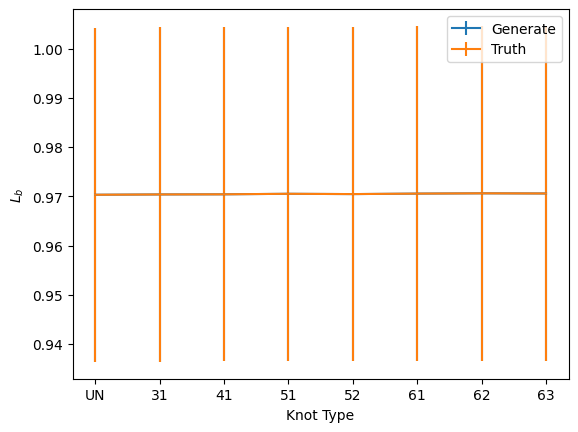

In [35]:
plt.errorbar(LABEL, np.array(Bond_gen).mean(axis=1), np.array(Bond_gen).std(axis=1),label = 'Generate')
plt.errorbar(LABEL, np.array(Bond_real).mean(axis=1), np.array(Bond_real).std(axis=1),label = 'Truth')
# plt.plot(LABEL, np.array(Bond_gen).mean(axis=1),label = 'Generate')
# plt.plot(LABEL,np.array(Bond_real).mean(axis=1),label = 'Truth')
plt.xlabel('Knot Type')
plt.ylabel('$L_b$')
plt.legend()

In [45]:
with open('gen_knots.txt', 'w') as f:
    gen_knots = np.load(f'/home/zzhang/KnotFormer/Guided_Diff_L80/gene_data/test/gene_gd10_51.npy')
    for knot in gen_knots:
        f.write(f"{knot.shape[0]}\n")
        f.write("Generated Knot\n")
        for atom in knot:
            f.write(f"0 {atom[0]} {atom[1]} {atom[2]}\n")

    
# R_g(np.array([gen_knots[0]]))

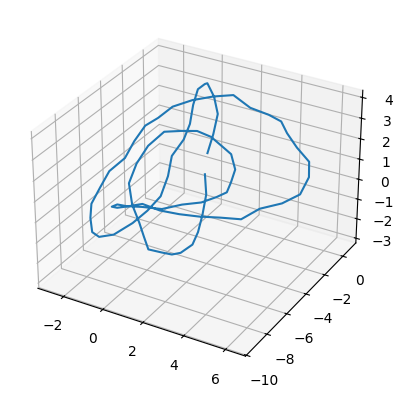

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(knots[0][:, 0], knots[0][:, 1], knots[0][:, 2])
plt.show()

In [23]:
np.linalg.norm(np.roll(knots[0],shift=1,axis =0) - knots[0],axis = -1)

array([0.9771786 , 0.92035997, 0.98045325, 0.9761269 , 0.9297017 ,
       0.9620353 , 0.9697201 , 0.98550034, 0.934753  , 0.9455661 ,
       0.9630838 , 1.0164939 , 0.95108306, 0.96196836, 0.9245246 ,
       0.96411484, 0.97555524, 0.95520884, 1.0035069 , 1.0068465 ,
       1.0392942 , 0.9488652 , 1.0272276 , 0.92701715, 0.9392739 ,
       0.98004204, 0.9166284 , 0.9845589 , 1.0055019 , 0.9473874 ,
       0.9252099 , 1.0208555 , 0.97702324, 0.9630173 , 0.99411553,
       0.9698344 , 0.97893393, 0.99779266, 0.92892206, 0.90503883,
       0.94093275, 1.0159572 , 0.97119397, 0.99712384, 0.97017795,
       1.0293454 , 0.99340564, 0.98073786, 0.88069564, 0.960522  ,
       1.0256008 , 0.9563611 , 0.9913291 , 1.0176184 , 0.9602034 ,
       0.92424273, 0.963612  , 0.9800336 , 1.0069644 , 0.94540423,
       1.0021111 , 1.0136042 , 0.98830014, 0.98124355, 0.9799227 ,
       0.9827968 , 0.9651206 , 0.97151434, 0.96587557, 1.0199275 ,
       1.0140139 , 0.95022786, 0.93825287, 0.9761781 , 0.98516